<a href="https://colab.research.google.com/github/grimgrimberg/BGU/blob/main/%D7%A2%D7%91%D7%95%D7%93%D7%94_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [241]:
#In this program we will use the filterd dogs and cat data set to identify any given image.

# Part 1

getting the data

In [242]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip  #getting the data

--2023-01-04 11:42:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  20.4MB/s    in 3.9s    

2023-01-04 11:42:12 (16.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



opening the zip and extracing it

In [243]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

classifing directories

In [244]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

now that we have a train folder and a val folde we can start, first we'll check that we have the files, we'll sort them by name order and print the first 10 files.

In [245]:
train_cat_fnames = os.listdir(train_cats_dir)
train_cat_fnames.sort()
print(train_cat_fnames[:10])
train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


we'll want to see that our model is balanced. that we have a sufficent amount of train data and val data and that the numbers are almost even.

In [246]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


lets put both of the dogs and cats data on a 4X4 matrix with 8  random dogs and 8 random cats:

In [247]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

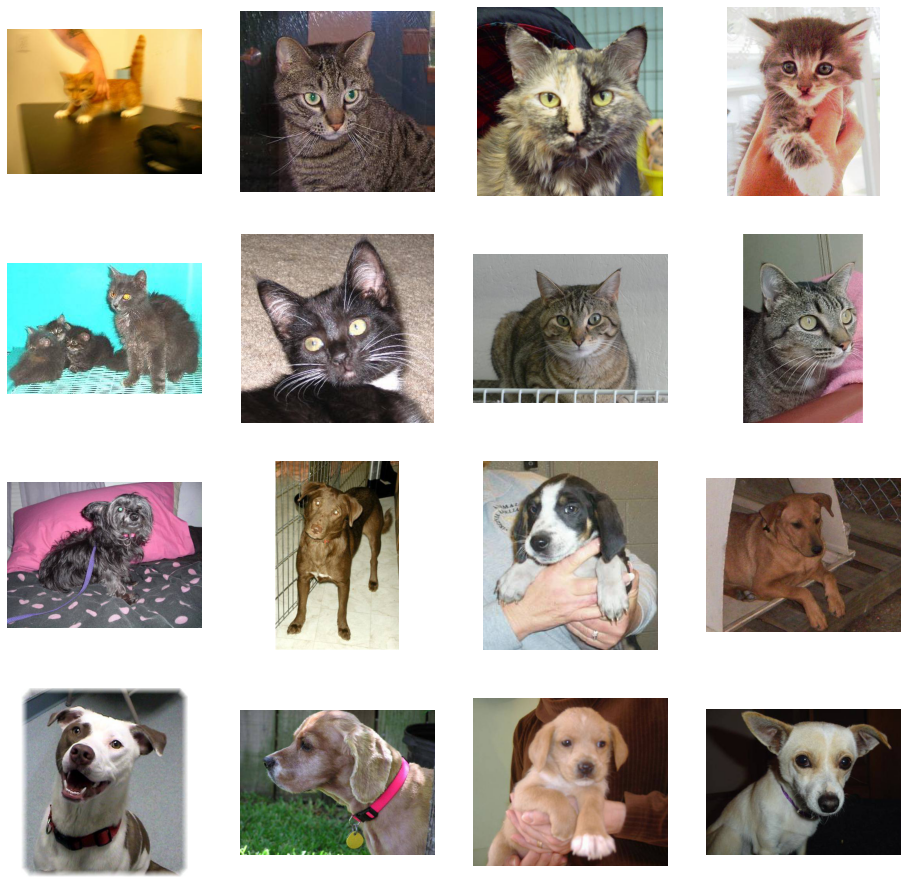

In [248]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


its time to build a simple conv

In [249]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow as tf

In [250]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input) #16 is the number of fillters, 3 is filter size
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

were doint multiple convs to improve the model overall. after that we'll flatten the image

In [251]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

we have a model, lets summerize.

In [252]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the Machine Learning Crash Course.) We will use the rmsprop optimizer with a learning rate of 0.001. During training, we will want to monitor classification accuracy.

NOTE: In this case, using the RMSprop optimization algorithm is preferable to stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as Adam and Adagrad, also automatically adapt the learning rate during training, and would work equally well here.)

In [253]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


data proccecing, divides data to 500 train for each dogs and cats and 1000 for val for each dog and cat

In [254]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def train_val_creator(batch_size=20):
  # batch_size = 20
  # All images will be rescaled by 1./255
  train_datagen = ImageDataGenerator(rescale=1./255)
  val_datagen = ImageDataGenerator(rescale=1./255)

  # Flow training images in batches of 20 using train_datagen generator
  train_generator = train_datagen.flow_from_directory(
          train_dir,  # This is the source directory for training images
          target_size=(150, 150),  # All images will be resized to 150x150
          batch_size=batch_size,
          # batch_size=20,
          # Since we use binary_crossentropy loss, we need binary labels
          class_mode='binary')

  # Flow validation images in batches of 20 using val_datagen generator
  validation_generator = val_datagen.flow_from_directory(
          validation_dir,
          target_size=(150, 150),
          # batch_size=20,
          batch_size=batch_size,
          class_mode='binary')
  return train_generator,validation_generator

In [255]:
# def batchexploer(batch_size):


training for model

In [256]:
# [train_generator,validation_generator] = model_creator()

In [257]:
# history = model.fit(
#       train_generator,
#       #steps_per_epoch=100,  # 2000 images = batch_size * steps
#       epochs=15,
#       validation_data=validation_generator,
#       #validation_steps=50,  # 1000 images = batch_size * steps
#       verbose=2)

In [258]:
Batch_size=[4,128,512,1024]
for i in Batch_size:
  print("For batch size " + str([i]))



For batch size [4]
For batch size [128]
For batch size [512]
For batch size [1024]


In [259]:
print('Model_batch'+str(Batch_size[2]))

Model_batch512


In [260]:
Batch_size=[4,128,512,1024]
history = []
tf.keras.backend.clear_session()
def model_trainer():
  # [train_generator,validation_generator] =  train_val_creator()
  for i in Batch_size:
    [train_generator,validation_generator] =  train_val_creator(i)
    print("For batch size " + str([i]))
    history.append(model.fit(
    train_generator,batch_size = i,
      #steps_per_epoch=100,  # 2000 images = batch_size * steps
    epochs=10,
    validation_data=validation_generator,
      #validation_steps=50,  # 1000 images = batch_size * steps
    verbose=2))
    # Model_batch[i] = model.save('Model_' + str(i))
    model.save('Model_' + str(i))
    #reseting
    tf.keras.backend.clear_session()
    model.reset_states()
  # return Model_batch[i]

In [261]:
model_trainer()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
For batch size [4]
Epoch 1/10
500/500 - 10s - loss: 0.7111 - acc: 0.5935 - val_loss: 0.6025 - val_acc: 0.6750 - 10s/epoch - 21ms/step
Epoch 2/10
500/500 - 9s - loss: 0.5966 - acc: 0.6935 - val_loss: 0.5889 - val_acc: 0.6880 - 9s/epoch - 19ms/step
Epoch 3/10
500/500 - 9s - loss: 0.5325 - acc: 0.7500 - val_loss: 0.5891 - val_acc: 0.7100 - 9s/epoch - 19ms/step
Epoch 4/10
500/500 - 9s - loss: 0.4890 - acc: 0.7740 - val_loss: 0.5999 - val_acc: 0.7140 - 9s/epoch - 18ms/step
Epoch 5/10
500/500 - 9s - loss: 0.4370 - acc: 0.8130 - val_loss: 0.5813 - val_acc: 0.7180 - 9s/epoch - 19ms/step
Epoch 6/10
500/500 - 9s - loss: 0.3705 - acc: 0.8410 - val_loss: 1.0024 - val_acc: 0.6690 - 9s/epoch - 19ms/step
Epoch 7/10
500/500 - 9s - loss: 0.3320 - acc: 0.8645 - val_loss: 0.7212 - val_acc: 0.6750 - 9s/epoch - 19ms/step
Epoch 8/10
500/500 - 9s - loss: 0.3122 - acc: 0.8840 - val_loss: 0.8481 - val_acc: 0.7200 - 9s/epoch - 1

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
For batch size [128]
Epoch 1/10
16/16 - 8s - loss: 0.0739 - acc: 0.9740 - val_loss: 1.2700 - val_acc: 0.7360 - 8s/epoch - 529ms/step
Epoch 2/10
16/16 - 10s - loss: 0.0381 - acc: 0.9890 - val_loss: 1.3758 - val_acc: 0.7460 - 10s/epoch - 601ms/step
Epoch 3/10
16/16 - 8s - loss: 0.0460 - acc: 0.9835 - val_loss: 1.3741 - val_acc: 0.7450 - 8s/epoch - 493ms/step
Epoch 4/10
16/16 - 8s - loss: 0.0254 - acc: 0.9945 - val_loss: 1.5736 - val_acc: 0.7400 - 8s/epoch - 487ms/step
Epoch 5/10
16/16 - 9s - loss: 0.0772 - acc: 0.9780 - val_loss: 1.1453 - val_acc: 0.6730 - 9s/epoch - 546ms/step
Epoch 6/10
16/16 - 8s - loss: 0.0300 - acc: 0.9940 - val_loss: 1.6255 - val_acc: 0.7420 - 8s/epoch - 489ms/step
Epoch 7/10
16/16 - 8s - loss: 0.0076 - acc: 0.9990 - val_loss: 1.7583 - val_acc: 0.7360 - 8s/epoch - 497ms/step
Epoch 8/10
16/16 - 8s - loss: 0.0104 - acc: 0.9975 - val_loss: 5.0889 - val_acc: 0.5670 - 8s/epoch - 493ms/st

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
For batch size [512]
Epoch 1/10
4/4 - 9s - loss: 0.0023 - acc: 1.0000 - val_loss: 1.8160 - val_acc: 0.7450 - 9s/epoch - 2s/step
Epoch 2/10
4/4 - 8s - loss: 0.0019 - acc: 1.0000 - val_loss: 1.8660 - val_acc: 0.7440 - 8s/epoch - 2s/step
Epoch 3/10
4/4 - 8s - loss: 0.0017 - acc: 1.0000 - val_loss: 1.9014 - val_acc: 0.7420 - 8s/epoch - 2s/step
Epoch 4/10
4/4 - 8s - loss: 0.0015 - acc: 1.0000 - val_loss: 1.9582 - val_acc: 0.7430 - 8s/epoch - 2s/step
Epoch 5/10
4/4 - 8s - loss: 0.0013 - acc: 1.0000 - val_loss: 1.9772 - val_acc: 0.7390 - 8s/epoch - 2s/step
Epoch 6/10
4/4 - 8s - loss: 0.0012 - acc: 1.0000 - val_loss: 2.0007 - val_acc: 0.7420 - 8s/epoch - 2s/step
Epoch 7/10
4/4 - 8s - loss: 9.3281e-04 - acc: 1.0000 - val_loss: 2.0255 - val_acc: 0.7350 - 8s/epoch - 2s/step
Epoch 8/10
4/4 - 8s - loss: 8.0246e-04 - acc: 1.0000 - val_loss: 2.0649 - val_acc: 0.7380 - 8s/epoch - 2s/step
Epoch 9/10
4/4 - 8s - loss: 7.9

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
For batch size [1024]
Epoch 1/10
2/2 - 11s - loss: 4.5865e-04 - acc: 1.0000 - val_loss: 2.2491 - val_acc: 0.7400 - 11s/epoch - 5s/step
Epoch 2/10
2/2 - 8s - loss: 4.0695e-04 - acc: 1.0000 - val_loss: 2.2368 - val_acc: 0.7350 - 8s/epoch - 4s/step
Epoch 3/10
2/2 - 8s - loss: 3.6794e-04 - acc: 1.0000 - val_loss: 2.2946 - val_acc: 0.7410 - 8s/epoch - 4s/step
Epoch 4/10
2/2 - 8s - loss: 3.7113e-04 - acc: 1.0000 - val_loss: 2.3426 - val_acc: 0.7430 - 8s/epoch - 4s/step
Epoch 5/10
2/2 - 8s - loss: 4.2774e-04 - acc: 1.0000 - val_loss: 2.3774 - val_acc: 0.7430 - 8s/epoch - 4s/step
Epoch 6/10
2/2 - 8s - loss: 3.6381e-04 - acc: 1.0000 - val_loss: 2.3497 - val_acc: 0.7420 - 8s/epoch - 4s/step
Epoch 7/10
2/2 - 8s - loss: 2.9235e-04 - acc: 1.0000 - val_loss: 2.4141 - val_acc: 0.7390 - 8s/epoch - 4s/step
Epoch 8/10
2/2 - 8s - loss: 3.6389e-04 - acc: 1.0000 - val_loss: 2.4811 - val_acc: 0.7370 - 8s/epoch - 4s/step
Epoc

visualising the code

1/1 [==============================] - 0s 75ms/step


<ipython-input-282-ef7c9d41109e>:43: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


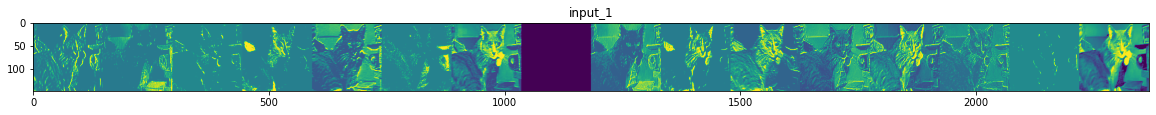

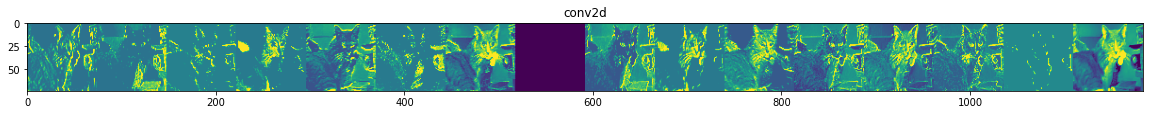

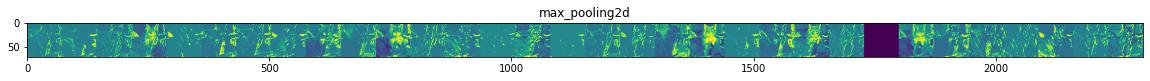

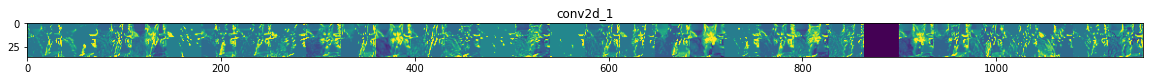

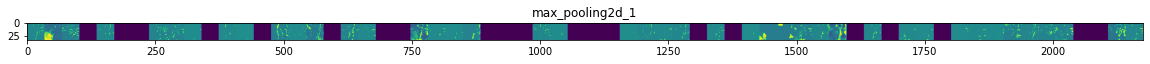

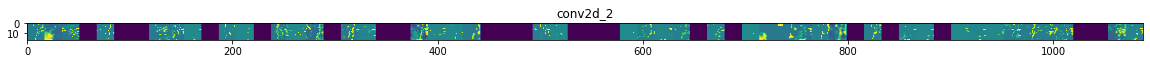

In [282]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)

img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

loses on model

In [286]:
def win_lose():
  for i in range(0,len(Batch_size)):
  # Retrieve a list of accuracy results on training and validation data
  # sets for each training epoch
    acc = history[i].history['acc']
    val_acc = history[i].history['val_acc']

    # Retrieve a list of list results on training and validation data
    # sets for each training epoch
    loss = history[i].history['loss']
    val_loss = history[i].history['val_loss']

    # Get number of epochs
    epochs = range(len(acc))
    plt.title('Training and validation accuracy For Batch: ' + str(Batch_size[i]))
    plt.plot(epochs, acc,label='Train_accuracy')
    plt.plot(epochs, val_acc,label='Validation_accuracy')
    plt.figure()
    plt.title('Training and validation loss For Batch: ' + str(Batch_size[i]))
    plt.plot(epochs, loss,label='Train_loss')
    plt.plot(epochs, val_loss,label='Validation_loss')
    plt.figure()
    acc.clear
    val_acc.clear
    loss.clear
    val_loss.clear

In [ ]:
# for i in range(0,4):
#   acc = history[i].history['acc']
#   val_acc = history[i].history['val_acc']
#   loss = history[i].history['loss']
#   val_loss = history[i].history['val_loss']
#   epochs = range(len(acc))
#   plt.title('Training and validation accuracy For Batch: ' + str(batch_size[i]))
#   plt.plot(epochs, acc,'r',label='Train_accuracy')
#   plt.plot(epochs, val_acc,'b',label='Validation_accuracy')
#   plt.figure()
#   plt.title('Training and validation loss For Batch: ' + str(batch_size[i]))
#   plt.plot(epochs, loss,'r',label='Train_loss')
#   plt.plot(epochs, val_loss,'b',label='Validation_loss')
#   plt.figure()
#   acc.clear
#   val_acc.clear
#   loss.clear
#   val_loss.clear

In [ ]:
# win_lose(train_generator,validation_generator)

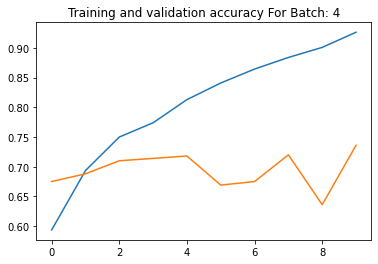

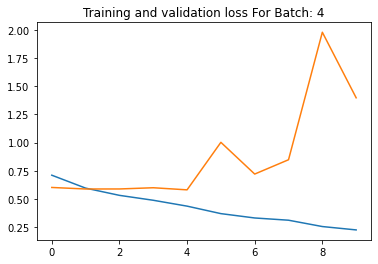

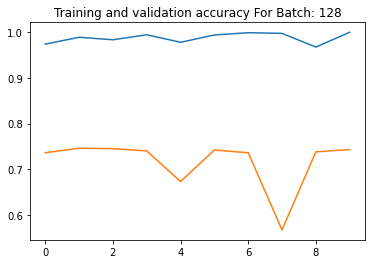

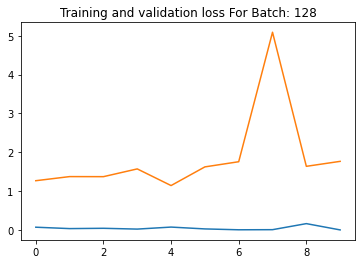

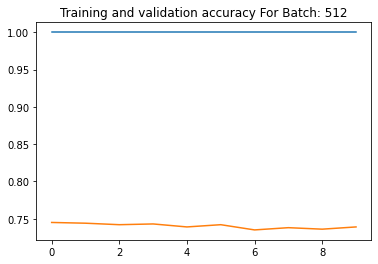

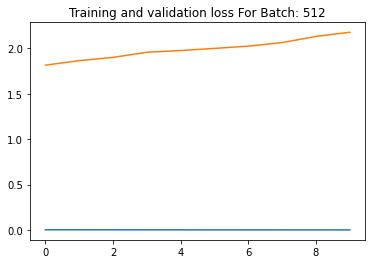

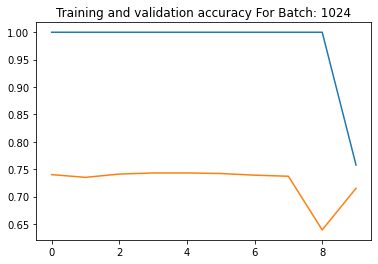

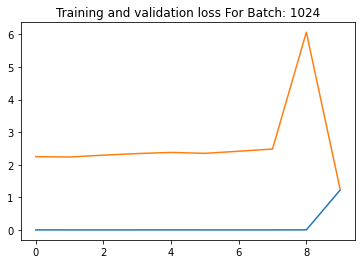

<Figure size 432x288 with 0 Axes>

In [287]:
win_lose()

this was just the example from the tirgul. now we start the acutal work.


first we need to change batch values. 

we'll change the batch. for every requritments i dont know if i need it

In [ ]:
[train_generator_4,validation_generator_4] = model_creator(4)

In [ ]:
Model_batch4 = model.fit(
      train_generator_4,
      #steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator_4,
      #validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
win_lose(train_generator_4,validation_generator_4)

In [ ]:
[train_generator_128,validation_generator_128] = model_creator(128)

In [ ]:
Model_batch128 = model.fit(
      train_generator_128,
      #steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator_128,
      #validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
win_lose(train_generator_128,validation_generator_128)

In [ ]:
[train_generator_512,validation_generator_512] = model_creator(512)

In [ ]:
Model_batch512 = model.fit(
      train_generator_512,
      #steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator_512,
      #validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
win_lose(train_generator_512,validation_generator_512)

In [ ]:
[train_generator_1024,validation_generator_1024] = model_creator(1024)

In [ ]:
Model_batch1024 = model.fit(
      train_generator_1024,
      #steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator_1024,
      #validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
win_lose(train_generator_1024,validation_generator_1024)